In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\anac\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anac\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anac\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anac\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of ty

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

In [6]:
y_test.shape


(10000, 1)

In [7]:
# visualize data


[9]


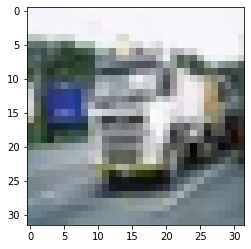

In [8]:
i = 1000
plt.imshow(x_train[i])
print(y_train[i])

[1]


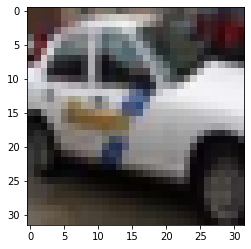

In [9]:
i = 2005

plt.imshow(x_train[i])
print(y_train[i])

[5]


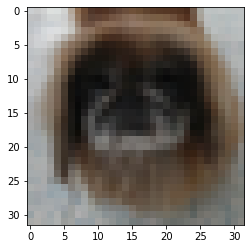

In [10]:
i = 999
plt.imshow(x_train[i])
print(y_train[i])

[3]


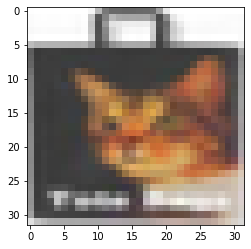

In [11]:
i = 3000
plt.imshow(x_train[i])
print(y_train[i])

[8]


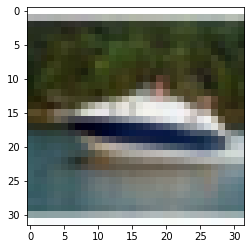

In [12]:
i = 1300
plt.imshow(x_train[i])
print(y_train[i])

C:\anac\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


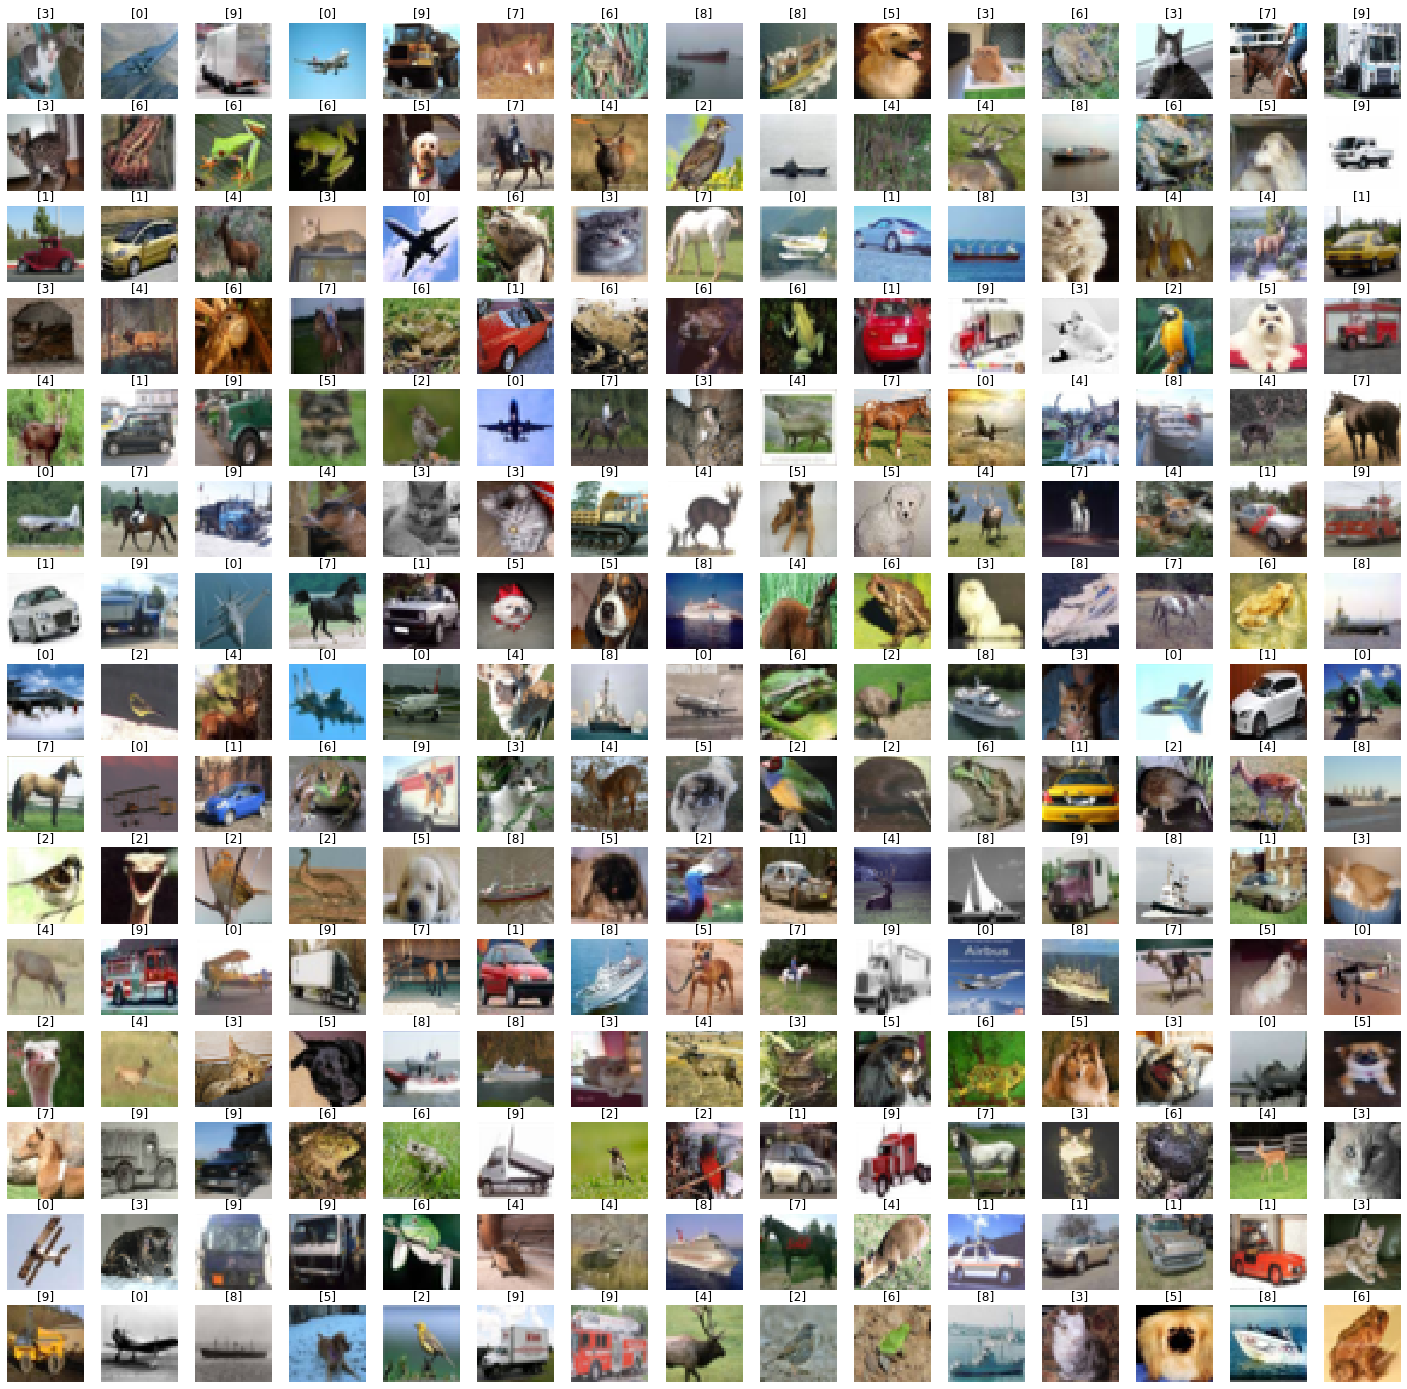

In [13]:
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0, n_training) # pick a random_number
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

In [14]:
# data preparation

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test = keras.utils.to_categorical(y_test, 10)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
input_shape = x_train.shape[1:]

In [27]:
input_shape

(32, 32, 3)

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(AveragePooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [30]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])


In [ ]:
history = cnn_model.fit(x_train, y_train, batch_size = 32, epochs = 100, shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
50000/50000 [==============================] - 436s 9ms/step - loss: 1.7799 - acc: 0.4270
Epoch 2/100
50000/50000 [==============================] - 437s 9ms/step - loss: 1.1144 - acc: 0.6157
Epoch 3/100
50000/50000 [==============================] - 442s 9ms/step - loss: 1.0092 - acc: 0.6580
Epoch 4/100
50000/50000 [==============================] - 433s 9ms/step - loss: 0.9475 - acc: 0.6849
Epoch 5/100
50000/50000 [==============================] - 432s 9ms/step - loss: 0.9144 - acc: 0.6986
Epoch 6/100
50000/50000 [==============================] - 434s 9ms/step - loss: 0.9081 - acc: 0.7024
Epoch 7/100
50000/50000 [==============================] - 418s 8ms/step - loss: 0.8857 - acc: 0.7112
Epoch 8/100
50000/50000 [==============================] - 395s 8ms/step - loss: 0.8836 - acc: 0.7147
Epoch 9/100
50000/50000 [==============================] - 408s 8ms/step - loss: 0.8851 - 

In [ ]:
# evaluate model
eval = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(eval[1]))

In [ ]:
predicted_classes = cnn_model.predict_classes(x_test)
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

In [ ]:
l = 7
w = 7
fig, axes = plt.subplots(l, w, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm 
plt.figure(figsize = (10, 10))
sns.heatmap(cm , annot = True)

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_cnn_model')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = ps.path.join(director, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [ ]:
n = 8
x_train_sample = x_train[:n]
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train.fit(x_train_sample)

In [ ]:
from scipy.misc import toimage
fig = plt.figure(figsize = (20, 2))
for x_batch in dataget_train.flow(x_train_sample, batch_size = n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(toimage(x_batch[i]))
    fig.suptitle('Augmented images(rotated 90 degrees)')
    plt.show()
    break;

In [ ]:
datagen = ImageDataGenerator(rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True)

In [ ]:
datagen.fit(x_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = cnn_model.evaluate(x_test, y_test)
print('test_accuracy', score[1])
